In [1]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.transform import rescale
import rasterio
from shapely.geometry import box
import numpy as np
import rasterio
from glob import glob
from rasterio.warp import calculate_default_transform, reproject, Resampling
import os
import urllib.request
import requests
# import config
import json
import geopandas as gpd
import affine
import fiona
import argparse
import rasterio
from rasterio.merge import merge
import rasterio.mask
from rasterio.enums import Resampling
import geojson
import zipfile
import geojson
import geopandas as gpd
import requests
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from pyroSAR import identify_many
from pyroSAR import finder
import xml.etree.ElementTree as ET
import tarfile
import subprocess
import time
import math
import datetime
from scipy.io import loadmat, savemat
from tqdm import tqdm
import pprint
import os
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from rasterio.mask import mask
import scipy
import datetime
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from glob import glob
import rasterio
import numpy as np
import os
import copy

In [2]:
sample = '/Field_data/Processed/join.shp'
df = gpd.read_file(sample)
df.head()

,Join_Count,TARGET_FID,JOIN_FID,Id,Id_1,Name,Descript,Type,Comment,Symbol,DateTimeS,Elevation,OBJECTID,DateTime,class,code,geometry
0,1,0,1714,0,0,None,None,Millet,None,None,None,0.000000,0,1899-12-30,Millet,None,"POLYGON Z ((294357.688 1265737.389 0.000, 2944..."
1,1,1,1713,0,0,None,None,Maize,None,None,None,0.000000,0,1899-12-30,Maize,None,"POLYGON Z ((294374.415 1265679.403 0.000, 2944..."
2,1,2,1445,0,0,1592,None,Maize,None,"Navaid, Blue",2022-10-30T13:13:20Z,1966.403198,166,2022-10-30,Maize,None,"POLYGON Z ((294867.293 1266086.976 0.000, 2948..."
3,1,3,993,0,0,2841,None,Avocado,Horticulture,Golf Course,2022-10-30T13:11:46Z,1968.318726,226,2022-10-30,Fruits,None,"POLYGON Z ((294936.430 1266086.418 0.000, 2949..."
4,1,4,1447,0,0,1599,None,Teff,None,"Navaid, Blue",2022-10-30T13:15:10Z,1967.045776,173,2022-10-30,Teff,None,"POLYGON Z ((295039.020 1266078.055 0.000, 2950..."


In [4]:
rep = np.unique(list(df['Type']), return_counts=True)

C:\Anaconda3\envs\sirak\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Anaconda3\envs\sirak\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
C:\Anaconda3\envs\sirak\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


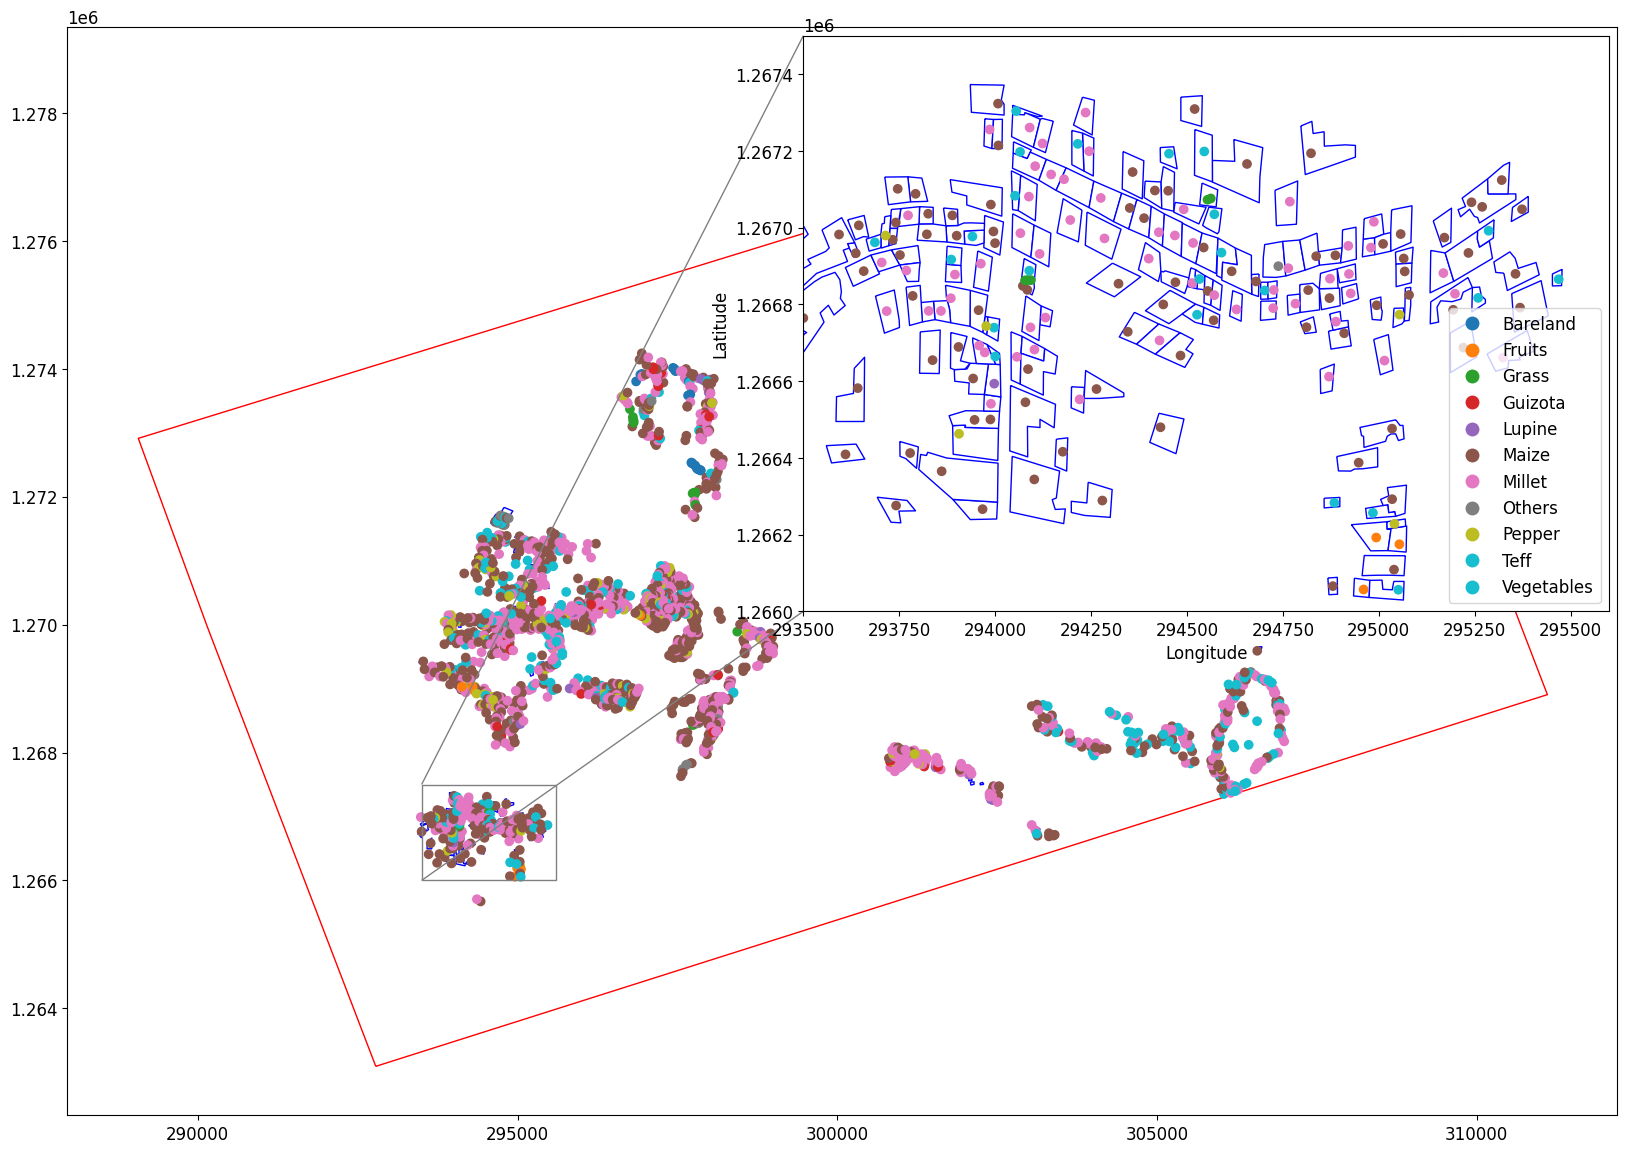

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np

fig, ax = plt.subplots(figsize=(5,4))
extent = (0, 100, 0, 50)
x, y = np.mgrid[-5:5:100j, -5:5:100j]
z = np.sin(2*x)*np.sin(y**2)
ax.contourf(x, y, z, cmap="YlGnBu_r")
axins = zoomed_inset_axes(ax, 2, loc=1)
axins.contourf(x, y, z, cmap="YlGnBu_r")
axins.set_xlim(1, 2)
axins.set_ylim(1, 2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()


###

fig, ax = plt.subplots(1,1, figsize=(20,15))
aa = gpd.read_file(file)
bbox = gpd.read_file(aoi)
bbox = bbox.to_crs(aa.crs)
poly = gpd.read_file(polys).to_crs(aa.crs)
# ax.imshow(rgb)
bbox.plot(ax=ax, color='white', edgecolor='red')
poly.plot(ax=ax, color='white', edgecolor='blue')
aa.plot(column="croptype", ax=ax, legend=True)

axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axisns.imshow(rgb)
poly.plot(ax=axins, color='white', edgecolor='blue')
aa.plot(column="croptype", ax=axins, legend=True)
axins.set_xlim(292500+1000, 295000+600) # Limit the region for zoom
axins.set_ylim(1266000,1268000-500)
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
# plt.xticks(visible=False) 
# plt.yticks(visible=False)
plt.ylabel('Latitude')
plt.xlabel('Longitude')


plt.savefig(fname='/Figures/samples_poly_inset.png', 
            dpi=400,
            bbox_inches='tight')
# plt.draw()
plt.show()

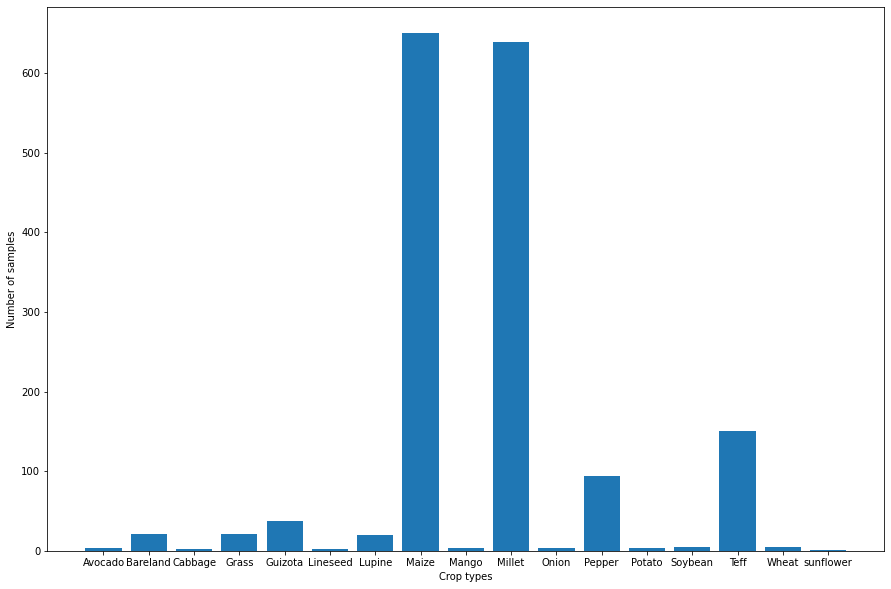

In [13]:
plt.figure(figsize=(15, 10))
plt.bar(rep[0], rep[1])
plt.ylabel('Number of samples')
plt.xlabel('Crop types')
fname = '/Figures/cropType_distribution.png'
plt.savefig(fname=fname, dpi=350, facecolor='auto', edgecolor='auto', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np


In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
extent = (0, 100, 0, 50)
x, y = np.mgrid[-5:5:100j, -5:5:100j]
z = np.sin(2*x)*np.sin(y**2)
ax.contourf(x, y, z, cmap="YlGnBu_r")
axins = zoomed_inset_axes(ax, 2, loc=1)
axins.contourf(x, y, z, cmap="YlGnBu_r")
axins.set_xlim(1, 2)
axins.set_ylim(1, 2)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()


###
file = 'file.shap'
aoi = 'aoi.shp'
fig, ax = plt.subplots(1,1, figsize=(20,15))
aa = gpd.read_file(file)
bbox = gpd.read_file(aoi)
bbox = bbox.to_crs(aa.crs)
poly = gpd.read_file(polys).to_crs(aa.crs)
# ax.imshow(rgb)
bbox.plot(ax=ax, color='white', edgecolor='red')
poly.plot(ax=ax, color='white', edgecolor='blue')
aa.plot(column="croptype", ax=ax, legend=True)

axins = zoomed_inset_axes(ax, 6, loc=1) # zoom = 6
# axisns.imshow(rgb)
poly.plot(ax=axins, color='white', edgecolor='blue')
aa.plot(column="croptype", ax=axins, legend=True)
axins.set_xlim(292500+1000, 295000+600) # Limit the region for zoom
axins.set_ylim(1266000,1268000-500)
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")
# plt.xticks(visible=False) 
# plt.yticks(visible=False)
plt.ylabel('Latitude')
plt.xlabel('Longitude')


plt.savefig(fname='F:/EO_Africa_DAT/Figures/samples_poly_inset.png', 
            dpi=400,
            bbox_inches='tight')
# plt.draw()
plt.show()

In [77]:
tsxf = glob('/TeraSAR-X/Coregistered/*.tif')
shapes = glob('/Plot_shapes/*.shp')

In [103]:
# read
images = []
for i in range(len(tsxf)):
    for j in range(len(shapes)):
        src = rasterio.open(tsxf[i])
        with fiona.open(shapes[j], "r") as shapefile:
                geoms = [feature["geometry"] for feature in shapefile]
        #     geoms = gdf['geometry']
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)
#         out_image = (out_image-out_image.min())/(out_image.max()-out_image.min())
        stack = np.dstack((out_image[0], out_image[1], out_image[0]))
        images.append(stack)
#         plt.imshow(stack)
#         plt.show()
# crop
# create ratio band
# stck and visualize 

In [196]:
def normalize(x):
    return (x-x.min())/(x.max()-x.min())

In [16]:
def animationMaker(images, fold, name='image_animation'):
    '''Creates animations from list of arrays. The arrays might be mutlichannel RGB or grey scale ones'''
    fig, ax = plt.subplots()
    ax.axis('off')
    plt.axis('off')
    ims = []
    for i in range(len(images)):
        im = ax.imshow(images[i], animated=True)
        if i == 0:
            ax.imshow(images[i])  # show an initial one first
        ims.append([im])
        
    ani = animation.ArtistAnimation(fig, ims, interval=600, blit=True,
                                    repeat_delay=0, repeat=True)
    name = f'{fold}/{name}' + '.mp4'
    ani.save(name)

In [4]:
plts = glob('/Planet_Scope_Analytic/Crops/*.tif')
shapes = glob('/Plot_shapes/*.shp')

In [13]:
false_images = []
true_images = []
for i in range(len(plts)):
    for j in range(len(shapes)):
        src = rasterio.open(plts[i]).read()
#         with fiona.open(shapes[j], "r") as shapefile:
#                 geoms = [feature["geometry"] for feature in shapefile]
#         out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)
        
#         stack = np.dstack((normalize(out_image[3]), normalize(out_image[2]), normalize(out_image[1])))
#         fstack = np.dstack((normalize(src[3][900:2390, 900:3000]), normalize(src[2][900:2390, 900:3000]), normalize(src[1][900:2390, 900:3000])))
        tstack = np.dstack((normalize(src[2][900:2390, 900:3000]), normalize(src[1][900:2390, 900:3000]), normalize(src[0][900:2390, 900:3000])))
#         false_images.append(fstack)
        true_images.append(tstack)

In [13]:
plts = glob('/TeraSAR-X/Coregistered/*.tif')
false_images = []
true_images = []
for i in range(len(plts)):
#     for j in range(len(shapes)):
    src = rasterio.open(plts[i]).read()
    ims = src[:,900:2390, 900:3000]
#         with fiona.open(shapes[j], "r") as shapefile:
#                 geoms = [feature["geometry"] for feature in shapefile]
#         out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)

#         stack = np.dstack((normalize(out_image[3]), normalize(out_image[2]), normalize(out_image[1])))
#         fstack = np.dstack((normalize(src[3][900:2390, 900:3000]), normalize(src[2][900:2390, 900:3000]), normalize(src[1][900:2390, 900:3000])))
    tstack = np.dstack((normalize(ims[0]), normalize(ims[1]), normalize(ims[0]/ims[1])))
#         false_images.append(fstack)
    true_images.append(tstack)

<ipython-input-13-76740de32681>:14: RuntimeWarning: invalid value encountered in true_divide
  tstack = np.dstack((normalize(ims[0]), normalize(ims[1]), normalize(ims[0]/ims[1])))


In [1]:
out_fold = 'F:/EO_Africa_DAT/Animations'
# animationMaker(images=false_images, fold=out_fold, name='False_color')
animationMaker(images=true_images, fold=out_fold, name='RADAR')

In [143]:
senti = glob('F:/EO_Africa_DAT/Sentinel-2/Resampled/*.tif')
shapes = glob('F:/EO_Africa_DAT/Plot_shapes/*.shp')

In [145]:
images = []
for i in range(len(plts)):
    for j in range(len(shapes)):
        src = rasterio.open(plts[i])
        with fiona.open(shapes[j], "r") as shapefile:
                geoms = [feature["geometry"] for feature in shapefile]
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True)
        stack = np.dstack((out_image[0], out_image[1], out_image[2]))
        images.append(stack)

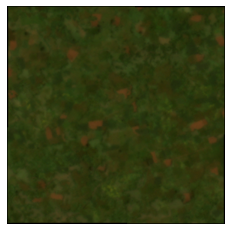

In [146]:
animationMaker(images=images, name='aaa_sentinel_animation')

In [17]:
def monthly_compositing(data_fold, name='July.tif', tile='T37PBN'):
#     sentinel_dawnload(data_folder)
    zip_files = [file for file in glob(f'{data_fold}/*.zip') if tile in file]  # check
    print(f'{len(zip_files)} images obtained for tile {tile}')
    new_path = data_fold + f'/{tile}'
    compsit_fold = data_fold + '/compsoites'
    if not os.path.exists(compsit_fold):
        os.makedirs(compsit_fold)
        
    if not os.path.exists(new_path):
        os.makedirs(new_path)
    R = np.empty((10980, 10980), np.uint16)
    B = np.empty((10980, 10980), np.uint16)
    G = np.empty((10980, 10980), np.uint16)
    N = np.empty((10980, 10980), np.uint16)
    P = []
    
    for j, fold in enumerate(os.listdir(new_path)): # iterate on all files
        print(f'Processing {fold} ...', end='\r', flush=True)
        xml_file = new_path + f'/{fold}/{fold}.SAFE/MTD_MSIL2A.xml'

        tree = ET.parse(xml_file)
        root = tree.getroot()

        ext = '.jp2'
        try:
            handle = root[0][0][11][0][0]
        except:
            print('Looking alternative paths')
        finally:
            if 'handle' in locals():
                pass
            else:
                handle = root[0][0][12][0][0]

        im_format = handle.attrib['imageFormat']
        texts = []
        for i in range(len(handle)):
            a = handle[i].text
            if ('R10m' in a and '_B0' in a) or ('_SCL_20m' in a):
                texts.append(a+ext)
        assert texts is not None, 'The images are not properly read'
        del handle   

        scl = os.path.split(xml_file)[0] + f'/{texts[-1]}' # scene classification layer
        rst = rasterio.open(scl).read()       # scene classification layer
        mask = np.empty(rst.shape, np.bool)  # empty mask

        del tree
        del root 

        inds = list(range(1, 12))
        for ind in inds:
            if ind in [3, 8, 9, 10]:
                mask[rst==ind] = False
            else:
                mask[rst==ind] = True
        mask = np.expand_dims(rescale(mask[0],
                       2,
                       clip=False,
                       preserve_range=True,
                       anti_aliasing=False,
                       anti_aliasing_sigma=False), axis=0)
        print(f'shape of resampled shape: {mask.shape}')
        
        flighter = rasterio.open(scl)
        left, bottom, right, top = flighter.bounds
        new_affine =  affine.Affine(10, 0.0, left, 0.0, -10, top)
        profile = flighter.profile
        profile['dtype'] = np.uint16
        profile['width'] = profile['width']*2
        profile['height'] = profile['height']*2
        profile['blockxsize'] = 1024
        profile['blockysize'] = 1024
        profile['count'] = 4
        profile['driver'] = 'GTiff'
        profile['transform'] = new_affine
        flighter.close()
        del flighter
        P.append(profile)
        
        for i,sample in enumerate(texts[:-1]):
            sample_path = os.path.split(xml_file)[0] + f'/{sample}'
            im = rasterio.open(sample_path).read()
            im = (im*mask.astype(im.dtype)).squeeze()
            if j == 0:
                if i == 0:
                    R = im
                elif i == 1:
                    G = im
                elif i == 2:
                    B = im
                else:
                    N = im
            else:
                if i == 0:
                    R = np.array([R, im]).max(axis=0)
                elif i == 1:
                    G = np.array([G, im]).max(axis=0)
                elif i == 2:
                    B = np.array([B, im]).max(axis=0)
                else:
                    N = np.array([N, im]).max(axis=0)
        
    print('Started compositing...')
    new_im = np.array([R, B, G, N]).astype(np.uint16) # data type
    file_to_save = compsit_fold + f'/{tile}_' + name 
    with rasterio.open(file_to_save, 'w', **P[0]) as dst:
        for i in range(new_im.shape[0]):
            dst.write(new_im[i], i+1)
    del R
    del G
    del B
    del N
    prnt('Done!')

In [3]:
data_dir = '/Sentinel-2/DATA_COMPOSITING'
monthly_compositing(data_fold=data_dir, name='July.tif', tile='T37PBN')

6 obtained for tile T37PBN
Looking alternative paths20804T074621_N0400_R135_T37PBN_20220804T112158 ...
shape of resampled shape: (1, 10980, 10980)
Looking alternative paths20814T074621_N0400_R135_T37PBN_20220814T112557 ...
shape of resampled shape: (1, 10980, 10980)
Looking alternative paths20824T074621_N0400_R135_T37PBN_20220824T112157 ...
shape of resampled shape: (1, 10980, 10980)
Looking alternative paths20809T074619_N0400_R135_T37PBN_20220809T101635 ...
shape of resampled shape: (1, 10980, 10980)
Looking alternative paths20819T074619_N0400_R135_T37PBN_20220819T101643 ...
shape of resampled shape: (1, 10980, 10980)
Looking alternative paths20829T074609_N0400_R135_T37PBN_20220829T101750 ...
shape of resampled shape: (1, 10980, 10980)
Started compositing


In [198]:
path = '/Data_Masks'
masks = [tsx_mask, fsent_msk, plntMaskFinal]
names = [f'{path}/tsxMask.tif', f'{path}/sentMask.tif',f'{path}/plntMask.tif']
profile = rasterio.open(plnt).profile
for j, mask in enumerate(masks):
    with rasterio.open(names[j], 'w', **profile) as dst:
        dst.write(mask.astype(np.uint8), 1)

In [18]:
def makeDatsetMask(sampledata, lc_scene, path_to_save, name=None):
    data = rasterio.open(sampledata)
    rst = data.read()[0]
    lc = rasterio.open(lc_scene).read()
    lcM = np.empty(lc.shape, lc.dtype)
    rstM = np.empty(rst.shape, rst.dtype)
    lcM[lc!=40] = 0
    lcM[lc==40] = 1
    
    rstM[rst==0] = 0
    rstM[rst!=0] = 1
    
    mask = rstM&lcM
    if name is None:
        name = f'{path_to_save}/mask.tif'
    else:
        name = f'{path_to_save}/{name}'
    
    with rasterio.open(name, 'w', **profile) as dst:
        dst.write(mask.astype(np.uint8), 1)
    print('Done!')

In [19]:
# buffer 
def patchify(mask, data_dir, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    mask = rasterio.open(mask).read()[0].astype(np.uint8)
    files = [f'{data_dir}/{file}' for file in os.listdir(data_dir) if file[-4:] in ['tiff', '.tif']]
    print(f'{len(files)} obtained ', end='\r', flush=True)
    arrays = np.array([rasterio.open(file).read() for file in files])
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i, j] ==1:
                name = f'{save_dir}/{str(i)}_{str(j)}.pt'
                print(f'Saving {i} >> {j}', end='\r', flush=True)
                torch.save(torch.from_numpy(arrays[:,:,i,j]), name)

In [209]:
mask = '/Data_Masks/plntMask.tif'
out_dir = '/Tensors/Test/Planet'
data_dir = '/Planet_Scope/Coregister'
patchify(mask=mask, data_dir=data_dir, save_dir=out_dir)

In [156]:
################
## extract samples from raster images andd save it as train test
data_dir = '/Planet_Scope/Coregister'
files = glob(f'{data_dir}/*.tiff')

In [157]:
shape = '/Plot_shapes/test_sample.shp'
shapefile = fiona.open(shape, "r")
geoms = [feature["geometry"] for feature in shapefile]
clases = [feature["properties"]['code'] for feature in shapefile]
# names = [feature["properties"]['name'] for feature in shapefile]

In [20]:
def saveArry2torch(array, folder, name='band', allinone=False,npr=False):
    if allinone:
        if npr:
            path = f'{folder}/{name}.npy'
            np.save(path, array)
            print(f'saved to path {path}')
        else:
            path = f'{folder}/{name}.pt'
            torch.save(torch.from_numpy(array.astype(float)), path)
            print(f'saved to path {path}')
    else:
        for i in range(array.shape[0]):
            path = f'{folder}/{name}_{str(i+1)}.pt'
            torch.save(torch.from_numpy(array[:,i,:].astype(float)),path)

In [21]:
def sortNames(files, start=11, end=19,time_text=False):
    '''Sorts alpha numeric file names of time series satellite images by time signature
    files: list of files to be sorted
    start: start position of date signature
    end: end position of time signature 
    returns: sorted file names
    '''
    dicts = {nn[start:end]:f'{os.path.split(files[0])[0]}/{nn}' for nn in [os.path.split(kes)[1] for kes in files]}
    outs = [dicts[key] for key in sorted(dicts.keys())]
    if time_text:
        return outs, sorted(list(dicts.keys()))
    else:
        return outs
# sortNames(sn, 11, 19, time_text=True)[1]

In [22]:
def text2DOY(time_text, time_format='%Y%m%d', doy=True):
    '''Çonverts text time signature to day of the year to compute time signature'''
    time_sig = datetime.datetime.strptime(time_text, time_format)
    if doy:
        return time_sig.timetuple().tm_yday
    else:
        return time_sig

In [23]:
def sample_geometry(shape, test_size=0.2):
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]['Type'] for feature in shapefile]
    class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in clases]
    xx = np.array(range(len(geoms))).reshape(-1,1) # ordered indexes of geometry
    yy = np.array(class_vals).reshape(-1,1)
    print('Train shape: ', xx.shape, 'label shape: ', yy.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=test_size, random_state=2, stratify=class_vals)
    
    return X_train.ravel().tolist(), X_test.ravel().tolist() # not relevant y_train.tolist(), y_test.tolist()

In [24]:
def computeNDI(red, nir, clip=True):
    val  = (nir-red)/((red+nir) + 0.000001)
    if clip:
        val[val>=1] = 1
        val[val<=-1] = -1
    return val

def computRVI(VV, VH):
    val = (4*VH)/((VV+VH) + 0.0000001)
    return val


def computeIndices(files, dataset=None, out_fold=None):
    if not os.path.exists(out_fold):
        os.makedirs(out_fold, exist_ok=True)
    print(f'Started processing for {dataset}..')
    for file in files:
        with rasterio.open(file, 'r') as src:
            meta = src.meta
            array = src.read()
            if dataset in ['planet', 'sentinel']:
                ind = computeNDI(array[2], array[3])
            else:
                ind = computRVI(array[1], array[0])
            meta.update({"count":1,
                        "dtype":np.float64})
            name = os.path.split(file)[1]
            with rasterio.open(f'{out_fold}/{name}', "w", **meta) as dest:
                dest.write(ind, 1)
                
def filternodata(x, nodata):
    x = x.reshape(-1,1)
    xx = np.delete(x, np.where(x==nodata)).tolist()
    xx = np.array(xx).reshape(-1,1) # .astype(float)
    return xx

In [123]:
rasters = glob('/TeraSAR-X/Coregistered/*.tif')
dirr = '/INDICES/TSX'
computeIndices(files=rasters, dataset='tsx', out_fold=dirr)

In [81]:
# # a = [0, 11, 4, 0, 11]
bb = fiona.open('/Field_data/Processed/join.shp')
clases = [feature["properties"]["class"] for feature in bb]

In [141]:
def extractRasterPlanet(files, shape, allinone=False, save=False, fold=None, data=None, sample=True, phase='train', test_size=0.2, npr=False, nodata=-255):
    files = sortNames(files, start=39, end=41)
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]["Type"] for feature in shapefile]   # class
    class_names = ['Bareland',
              'Fruits',
              'Grass',
              'Guizota',
              'Lupine',
              'Maize',
              'Millet',
              'Others',
              'Pepper',
              'Teff',
              'Vegetables']
    
#     class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in class_names]
    
    if sample: # sample polygon wise
        tr, ts = sample_geometry(shape=shape, test_size=test_size)
        if phase=='train':
            clases = [clases[ii] for ii in tr]
            geoms = [geoms[ii] for ii in tr]
        else:
            clases = [clases[ii] for ii in ts]
            geoms = [geoms[ii] for ii in ts]
        
    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind
        
    print(indexer)
    print('Processing...', end='\r', flush=True)
    
    C = []
    N = []
    R = []
    B = []
    G = []
    
    for (geom, lb) in zip(geoms, clases):
        n = []
        r = []
        b = []
        g = []
        
        for file in files:
            rst = rasterio.open(file)
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr = arr[:4]
            n.append(np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata)))
            r.append(np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata)))
            b.append(np.nanmean(filternodata(arr[2].reshape(-1,1),nodata=nodata)))
            g.append(np.nanmean(filternodata(arr[3].reshape(-1,1),nodata=nodata)))
        C+=[indexer[lb]] # *arr[0].reshape(-1,1).shape[0]   # take the numeric index of the class; starts from zero
        
        N.append(n) # np.hstack(r))
        R.append(r) # np.hstack(r))
        B.append(b) # np.hstack(b))
        G.append(g) # np.hstack(g))
    
    N = np.array(N) # np.vstack(N)
    R = np.array(R) # np.vstack(R)
    B = np.array(B) # np.vstack(B)
    G = np.array(G)# np.vstack(G)
    C = np.array(C).reshape(-1,1)
    
    print(f'Extracted RGB array summary')
    print(f'shape of Red: {R.shape}')
    print(f'shape of green: {G.shape}')
    print(f'shape of Blue: {B.shape}')
    print(f'shape of class: {C.shape}')
    
    if save:
        alls = np.dstack((N, R, G, B))
#         alls = np.array([R, G, B])
        print(f'image shape before removeing zeros: {alls.shape}')
        print(f'label shape before removeing zeros: {C.shape}')
        C = C[~np.all(alls == nodata, axis=(1,2))]
        alls = alls[~np.all(alls == nodata, axis=(1,2))]
    
        print(f'image shape after removeing zeros: {alls.shape}')
        print(f'label shape after removeing zeros: {C.shape}')
        
        img_fold = f'{fold}/{data}/{phase}/images'
        lb_fold = f'{fold}/{data}/{phase}/labels'
        
        if not os.path.exists(img_fold):
            os.makedirs(img_fold)
        if not os.path.exists(lb_fold):
            os.makedirs(lb_fold)
        
        if allinone:
            saveArry2torch(array=alls, folder=img_fold, name='points', allinone=allinone, npr=npr)
            saveArry2torch(array=C, folder=lb_fold, name='points', allinone=True, npr=npr)
        else:
            for i in range(alls.shape[1]):
                print(f'Saving {i} row', end='\r', flush=True)
                im_path = f'{img_fold}/{str(i)}_plt.pt'
                lb_path = f'{lb_fold}/{str(i)}_lbl.pt'
                val = alls[:,i,:]
                
                if np.all(val == 0):
                    pass
                else:
                    torch.save(torch.from_numpy(val.astype(float)),im_path)
                    torch.save(torch.from_numpy(C[i].astype(float)),lb_path)
    else:
        if allinone:
            alls = np.dstack((N, R, G, B))
            return {'array':alls, 'label':C}
        else:
            return {'N':N,'R':R,'G':G,'B':B,'C':C}

In [142]:
def extractRasterINDEXMean(files, dataset='planet', shape=None, save=False, fold=None, data=None, sample=True, phase='train', test_size=0.2):
    if dataset == 'planet':
        files = files # sortNames(files, start=21, end=28)
    elif dataset == 'sentinel':
        files = sortNames(files, start=11, end=19)
    else:
        files = sortNames(files, start=28, end=36)

    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]["Type"] for feature in shapefile]   # class
    class_names = ['Bareland',
              'Fruits',
              'Grass',
              'Guizota',
              'Lupine',
              'Maize',
              'Millet',
              'Others',
              'Pepper',
              'Teff',
              'Vegetables']
    
#     class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in class_names]
    
    if sample: # sample polygon wise
        tr, ts = sample_geometry(shape=shape, test_size=test_size)
        if phase=='train':
            clases = [clases[ii] for ii in tr]
            geoms = [geoms[ii] for ii in tr]
        else:
            clases = [clases[ii] for ii in ts]
            geoms = [geoms[ii] for ii in ts]
        
    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind
        
    print(indexer)
    print('Processing...', end='\r', flush=True)
    
    C = []
    NDVI = []
    o = 0
    for (geom, lb) in zip(geoms, clases):
        ndvi = []
        for file in files:
            rst = rasterio.open(file)
            nodata = rst.profile['nodata']
            if nodata == None:
                nodata = 0
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr[arr==nodata] = np.nan
            arr = np.nanmean(arr)
            if math.isnan(arr):
                pass
            else:
                ndvi.append(arr)  # or do some gap filling 
        if ndvi == [] or len(ndvi) != len(files):
            pass
        else:
            C+=[indexer[lb]]  # take the numeric index of the class; starts from zero
            NDVI.append(ndvi)
            o+=1
    NDVI = np.array(NDVI)
    C = np.array(C)
    print('Extracted index array summary')
    print(f'Index shape: {NDVI.shape}')
    print(f'Class shape: {C.shape}')

    print(f'image shape before removeing zeros: {NDVI.shape}')
    print(f'label shape before removeing zeros: {C.shape}')
    C = C[~np.all(NDVI == 0, axis=1)]
    NDVI = NDVI[~np.all(NDVI == 0, axis=1)]
    
    if save:
        print(f'NDVI shape after removeing zeros: {NDVI.shape}')
        print(f'label shape after removeing zeros: {C.shape}')
        
        img_fold = f'{fold}/{data}/{phase}/images'
        lb_fold = f'{fold}/{data}/{phase}/labels'
        
        if not os.path.exists(img_fold):
            os.makedirs(img_fold)
        if not os.path.exists(lb_fold):
            os.makedirs(lb_fold)
        saveArry2torch(array=NDVI, folder=img_fold, name='points', allinone=True, np=False)
        saveArry2torch(array=C, folder=lb_fold, name='points', allinone=True, np=False)
    else:
        return NDVI, C

In [11]:
# shape = 'F:/EO_Africa_DAT/Field_data/Processed/best_after_segment_join.shp'
# fil = gpd.read_file(shape)
# np.unique(fil['Type'], return_counts=True)

In [16]:
phases = ['train', 'test']
for phase in phases:
    files = glob('/INDICES/Planet/*.tif')
#     shape = 'F:/EO_Africa_DAT/Field_data/Processed/join.shp'
    sape = '/Field_data/Processed/best_after_segment_join.shp'
    out_fold = '/SITS_INDEX_MEAN/Planet'
    extractRasterINDEXMean(files=files, dataset='planet', shape=shape, save=True, fold=out_fold, sample=True, phase=phase, test_size=0.2)

Train shape:  (1664, 1) label shape:  (1664, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted index array summary
Index shape: (1331, 9)
Class shape: (1331,)
image shape before removeing zeros: (1331, 9)
label shape before removeing zeros: (1331,)
NDVI shape after removeing zeros: (1331, 9)
label shape after removeing zeros: (1331,)
saved to path F:/EO_Africa_DAT/SITS_INDEX_MEAN/Planet/train/images/points.pt
saved to path F:/EO_Africa_DAT/SITS_INDEX_MEAN/Planet/train/labels/points.pt
Train shape:  (1664, 1) label shape:  (1664, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted index array summary
Index shape: (333, 9)
Class shape: (333,)
image shape before removeing zeros: (333, 9)
label shape before removeing zeros: (333,)
NDVI shape after removeing zeros: (333, 9)


In [143]:
def extractIndexFull(files, dataset='planet', shape=None, allinone=False, save=False, fold=None, data=None, sample=True, phase='train', test_size=0.2):
    if dataset == 'planet':
        files = files # sortNames(files, start=21, end=28)
    elif dataset == 'sentinel':
        files = sortNames(files, start=11, end=19)
    else:
        files = sortNames(files, start=28, end=36)
        
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]["Type"] for feature in shapefile]   # class
    class_names = ['Bareland',
              'Fruits',
              'Grass',
              'Guizota',
              'Lupine',
              'Maize',
              'Millet',
              'Others',
              'Pepper',
              'Teff',
              'Vegetables']
    
#     class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in class_names]
    
    if sample: # sample polygon wise
        tr, ts = sample_geometry(shape=shape, test_size=test_size)
        if phase=='train':
            clases = [clases[ii] for ii in tr]
            geoms = [geoms[ii] for ii in tr]
        else:
            clases = [clases[ii] for ii in ts]
            geoms = [geoms[ii] for ii in ts]
            
    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind
        
    print(indexer)
    print('Processing...', end='\r', flush=True)
    
    NDVI = []
    C = []
    
    for (geom, lb) in zip(geoms, clases):
        ndvi = []
        for file in files:
            rst = rasterio.open(file)
#             nodata = rst.profile['nodata']
#             if nodata == None:
            nodata = 255
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arrv = filternodata(arr[0], nodata=nodata)
            ndvi.append(arrv)
        try:
            vv = np.hstack(tuple(ndvi))
            C+=[indexer[lb]]*vv.shape[0]   # take the numeric index of the class; starts from zero
            NDVI.append(vv)
        except:
            pass
    NDVI = np.vstack(NDVI)
    C = np.array(C) # .reshape(-1,1)
    
    print(f'Extracted RGB array summary')
    print(f'shape of NDVI: {NDVI.shape}')
    print(f'shape of class: {C.shape}')
    
    if save:
#         alls = np.dstack((R, G, B))
#         alls = np.array([R, G, B])
        print(f'image shape before removeing zeros: {NDVI.shape}')
        print(f'label shape before removeing zeros: {C.shape}')
#         C = C[~np.all(NDVI == 0, axis=1)]
#         alls = NDVI[~np.all(NDVI == 0, axis=1)]
    
        print(f'image shape after removeing zeros: {NDVI.shape}')
        print(f'label shape after removeing zeros: {C.shape}')
        
        img_fold = f'{fold}/{data}/{phase}/images'
        lb_fold = f'{fold}/{data}/{phase}/labels'
        
        if not os.path.exists(img_fold):
            os.makedirs(img_fold)
        if not os.path.exists(lb_fold):
            os.makedirs(lb_fold)
        
        if allinone:
            saveArry2torch(array=NDVI, folder=img_fold, name='points', allinone=True)
            saveArry2torch(array=C, folder=lb_fold, name='points', allinone=True)
#         else:
#             for i in range(alls.shape[1]):
#                 print(f'Saving {i} row', end='\r', flush=True)
#                 im_path = f'{img_fold}/{str(i)}_plt.pt'
#                 lb_path = f'{lb_fold}/{str(i)}_lbl.pt'
#                 val = alls[:,i,:]
                
#                 if np.all(val == 0):
#                     pass
#                 else:
#                     torch.save(torch.from_numpy(val.astype(float)),im_path)
#                     torch.save(torch.from_numpy(C[i].astype(float)),lb_path)
    else:
        return NDVI, C

In [11]:
phases = ['train', 'test']
for phase in phases:
    files = glob('/INDICES/TSX/*.tif')
    shape = '/Field_data/Processed/join.shp'
    out_fold = '/SITS_INDEX_MEANall/TSX'
    extractIndexFull(files=files,
                     dataset='tsx',
                     shape=shape,
                     allinone=True,
                     save=True,
                     fold=out_fold,
                     sample=True,
                     phase=phase,
                     test_size=0.2)

Train shape:  (1664, 1) label shape:  (1664, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted RGB array summary
shape of NDVI: (84727, 7)
shape of class: (84727,)
image shape before removeing zeros: (84727, 7)
label shape before removeing zeros: (84727,)
image shape after removeing zeros: (84727, 7)
label shape after removeing zeros: (84727,)
saved to path F:/EO_Africa_DAT/SITS_INDEX_MEANall/TSX/train/images/points.pt
saved to path F:/EO_Africa_DAT/SITS_INDEX_MEANall/TSX/train/labels/points.pt
Train shape:  (1664, 1) label shape:  (1664, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted RGB array summary
shape of NDVI: (22429, 7)
shape of class: (22429,)
image shape before removeing zeros: (22429, 7)
label shape before removeing zeros: (22429,)
image shape after remo

In [144]:
def extractRasterSentinel(files, shape, allinone=True, save=True, fold=None, data=None, sample=True, phase='train', test_size=0.2, npr=False, nodata=-255):
    files = sortNames(files, start=11, end=19)
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]["Type"] for feature in shapefile]  # class
    class_names = ['Bareland',
              'Fruits',
              'Grass',
              'Guizota',
              'Lupine',
              'Maize',
              'Millet',
              'Others',
              'Pepper',
              'Teff',
              'Vegetables']
#     class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in class_names]
    
    if sample: # sample polygon wise
        tr, ts = sample_geometry(shape=shape, test_size=test_size)
        if phase=='train':
            clases = [clases[ii] for ii in tr]
            geoms = [geoms[ii] for ii in tr]
        else:
            clases = [clases[ii] for ii in ts]
            geoms = [geoms[ii] for ii in ts]
        
    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind
        
    print(indexer)
    print('Processing...', end='\r', flush=True)
    
    C = []
    N = []
    R = []
    B = []
    G = []
    
    for (geom, lb) in zip(geoms, clases):
        n = []
        r = []
        b = []
        g = []

        for file in files:
            rst = rasterio.open(file)
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr = arr[:4]      # n.append(np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata)))
            n.append(np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata)))
            r.append(np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata)))
            b.append(np.nanmean(filternodata(arr[2].reshape(-1,1),nodata=nodata)))
            g.append(np.nanmean(filternodata(arr[3].reshape(-1,1),nodata=nodata)))
        C+=[indexer[lb]] # *arr[0].reshape(-1,1).shape[0]
        
        N.append(n) # np.hstack(n))
        R.append(r) # np.hstack(r))
        B.append(b) # np.hstack(b))
        G.append(g) # np.hstack(g))
    N = np.array(N) # np.vstack(N)
    R = np.array(R) # np.vstack(R)
    B = np.array(B) # np.vstack(B)
    G = np.array(G) # np.vstack(G)
    C = np.array(C).reshape(-1,1)
    
    print(f'Extracted RGBA array summary')
    print(f'shape of NIR: {N.shape}')
    print(f'shape of Red: {R.shape}')
    print(f'shape of green: {G.shape}')
    print(f'shape of Blue: {B.shape}')
    print(f'shape of class: {C.shape}')
    
    
    if save:
        alls = np.dstack((N, R, G, B))
#         alls = np.array([R, G, B])
        print(f'image shape before removeing zeros: {alls.shape}')
        print(f'label shape before removeing zeros: {C.shape}')
        C = C[~np.all(alls == nodata, axis=(1,2))]
        alls = alls[~np.all(alls == nodata, axis=(1,2))]
        
        print(f'image shape after removeing zeros: {alls.shape}')
        print(f'label shape after removeing zeros: {C.shape}')
        
        img_fold = f'{fold}/{data}/{phase}/images'
        lb_fold = f'{fold}/{data}/{phase}/labels'
        
        if not os.path.exists(img_fold):
            os.makedirs(img_fold)
        if not os.path.exists(lb_fold):
            os.makedirs(lb_fold)
        
        if allinone:
            saveArry2torch(array=alls, folder=img_fold, name='points', allinone=True, npr=npr)
            saveArry2torch(array=C, folder=lb_fold, name='points', allinone=True, npr=npr)
        else:
            for i in range(alls.shape[1]):
                print(f'Saving {i} row', end='\r', flush=True)
                im_path = f'{img_fold}/{str(i)}_plt.pt'
                lb_path = f'{lb_fold}/{str(i)}_lbl.pt'
                val = alls[:,i,:]
                
                if np.all(val == 0):
                    pass
                else:
                    torch.save(torch.from_numpy(val.astype(float)),im_path)
                    torch.save(torch.from_numpy(C[i].astype(float)),lb_path)
    else:
        if allinone:
            alls = np.dstack((N, R, G, B))
            return {'array':alls, 'label':C}
        else:
            return {'N':N,'R':R,'G':G,'B':B,'C':C}

In [145]:
def extractRasterTSX(files, shape, allinone=False, save=True, fold=None, data=None, sample=True, phase='train', test_size=0.2, npr=False, nodata=-255):
    files = sortNames(files, start=28, end=36)
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    clases = [feature["properties"]["Type"] for feature in shapefile]  # class
    class_names = ['Bareland',
              'Fruits',
              'Grass',
              'Guizota',
              'Lupine',
              'Maize',
              'Millet',
              'Others',
              'Pepper',
              'Teff',
              'Vegetables']
#     class_names = sorted(list(np.unique(clases)))
    class_vals = [class_names.index(val) for val in class_names]
    
    if sample: # sample polygon wise
        tr, ts = sample_geometry(shape=shape, test_size=test_size)
        if phase=='train':
            clases = [clases[ii] for ii in tr]
            geoms = [geoms[ii] for ii in tr]
        else:
            clases = [clases[ii] for ii in ts]
            geoms = [geoms[ii] for ii in ts]
        
    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind
        
    print(indexer)
    print('Processing...', end='\r', flush=True)
    
    C = []
    R = []
    B = []
   
    for (geom, lb) in zip(geoms, clases):
        r = []
        b = []
        for file in files:
            rst = rasterio.open(file)
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr = arr[:2]
            
            r.append(np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata)))
            b.append(np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata)))
            
        C+=[indexer[lb]] # *arr[0].reshape(-1,1).shape[0]
        R.append(r) # np.hstack(r))
        B.append(b) # np.hstack(b))

    R = np.array(R) # np.vstack(R)
    B = np.array(B) # np.vstack(B)
    C = np.array(C).reshape(-1,1)
    
    print(f'Extracted scattering arra summary')
    print(f'shape of VV: {R.shape}')
    print(f'shape of VH: {B.shape}')
    print(f'shape of class: {C.shape}')
    
    
    if save:
        alls = np.dstack((R, B))
#         alls = np.array([R, G, B])
        print(f'image shape before removeing zeros: {alls.shape}')
        print(f'label shape before removeing zeros: {C.shape}')
        C = C[~np.all(alls == nodata, axis=(1,2))]
        alls = alls[~np.all(alls == nodata, axis=(1,2))]
        
        print(f'image shape after removeing zeros: {alls.shape}')
        print(f'label shape after removeing zeros: {C.shape}')
        
        img_fold = f'{fold}/{data}/{phase}/images'
        lb_fold = f'{fold}/{data}/{phase}/labels'
        
        if not os.path.exists(img_fold):
            os.makedirs(img_fold)
        if not os.path.exists(lb_fold):
            os.makedirs(lb_fold)
        
        if allinone:
            saveArry2torch(array=alls, folder=img_fold, name='points', allinone=True, npr=npr)
            saveArry2torch(array=C, folder=lb_fold, name='points', allinone=True, npr=npr)
        else:
            for i in range(alls.shape[1]):
                print(f'Saving {i} row', end='\r', flush=True)
                im_path = f'{img_fold}/{str(i)}_plt.pt'
                lb_path = f'{lb_fold}/{str(i)}_lbl.pt'
                val = alls[:,i,:]
                
                if np.all(val == 0):
                    pass
                else:
                    torch.save(torch.from_numpy(val.astype(float)),im_path)
                    torch.save(torch.from_numpy(C[i].astype(float)),lb_path)
    else:
        if allinone:
            alls = np.dstack((R, B))
            return {'array':alls, 'label':C}
        else:
            return {'R':R,'B':B,'C':C}

In [ ]:
def find_indices(item, val):
    indices = []
    for idx, value in enumerate(item):
        if value == val:
            indices.append(idx)
    return indices

def sortNames(files, start=11, end=19,time_text=False):
    '''Sorts alpha numeric file names of time series satellite images by time signature
    files: list of files to be sorted
    start: start position of date signature
    end: end position of time signature 
    returns: sorted file names
    '''
    dicts = {nn[start:end]:f'{os.path.split(files[0])[0]}/{nn}' for nn in [os.path.split(kes)[1] for kes in files]}
    outs = [dicts[key] for key in sorted(dicts.keys())]
    if time_text:
        return outs, sorted(list(dicts.keys()))
    else:
        return outs
    
def tensifyScene(files, fold, chunck_size=50000, index_fold=None, save_index=False):
    sntl = sortNames(files[0], start=11, end=19)
    print(f'Sentinel fines: {len(sntl)}')
    
    plnt = files[1] # sortNames(files[1], start=21, end=28)
    print(f'Planet finesl: {len(plnt)}')
    
    tsx = sortNames(files[2],start=28, end=36)
    print(f'TerraSAR-X fines: {len(tsx)}')
    
    if not os.path.exists(index_fold):
        os.makedirs(index_fold, exist_ok=True)
    
    mask = '/Data_Masks/plntMask.tif'
    mask = rasterio.open(mask).read(1)
    mask = mask.reshape(-1,1)
    
    folds = ['Sentinel', 'Planet', 'TSX']
    datasets = [sntl, plnt, tsx]
    
    for o, dataset in enumerate(list(zip(datasets,folds))):
#         if dataset[1] not in ['Sentinel', 'Planet']:
        print(f'Processing for dataset {dataset[1]}...')
        out_fold = f'{fold}/{dataset[1]}'
        if not os.path.exists(out_fold):
            os.makedirs(out_fold, exist_ok=True)
        data_files = dataset[0]

        alls = []
        for file in data_files:
            a = rasterio.open(file).read() # [0].reshape(-1,1)
#             alls.append(a)
            print(file)
            if dataset[1] in ['Sentinel','Planet']:
                aa = np.squeeze(np.hstack((a[0].reshape(-1,1), a[1].reshape(-1,1), a[2].reshape(-1,1), a[3].reshape(-1,1))))
            else:
                aa = np.squeeze(np.hstack((a[0].reshape(-1,1), a[1].reshape(-1,1))))
            alls.append(aa)
        alls = np.dstack(alls)
        yes = list(~np.all(mask == 0, axis=(1,)))  # based on landcover mask
        alls = alls[yes]
        inds = list(range(0, alls.shape[0], chunck_size))

        print(f'Saving arrays for dataset {dataset[1]}')

        for j, ind in enumerate(inds):
            with open(f'{out_fold}/{str(j)}.npy', 'wb') as f:
                np.save(f, np.swapaxes(alls[ind:ind+chunck_size],2,1))   # to convert to [B, T, C]

        print(f'Finding and saving indexes for dataset {dataset[1]}')

        if o == 0 and save_index:
            indexes = find_indices(yes, True)
            indexes = np.array(indexes)

            indexes_all = np.array(yes)
            with open(f'{index_fold}/index_true.npy', 'wb') as ff:
                np.save(ff, indexes)
            with open(f'{index_fold}/index_all.npy', 'wb') as ff:
                np.save(ff, indexes_all)
        del alls
        print(f'Done for dataset {dataset[1]}')

In [ ]:

a =  sorted(glob('/Sentinel-2/Resampled/*.tif'))
b =  sorted(glob('/Planet_Scope_Analytic/Crops/*.tif'))
c =  sorted(glob('/TeraSAR-X/Coregistered/*.tif'))
fold = '/SITS_ALL_FullSceneSpectralMean_final'
ind_fold = '/AA_IndexOptim/SITS_ALL_index_spectralMean_final'
tensifyScene(files = (a, b, c), fold=fold, chunck_size=50000, index_fold=ind_fold, save_index=True)

In [12]:
def SuperPixels(files, fold, data='sentinel', shape=None, phase='train', nodata=-255, save=None, allinone=True):
    if data == 'sentinel':
        sorts = sortNames(files, start=11, end=19)
        print(f'Sentinel fines: {len(sorts)}')
    elif data == 'planet':
        sorts = files
#         sorts = sortNames(files, start=21, end=28)
        print(f'Planet fines: {len(sorts)}')
    else:
        sorts = sortNames(files,start=28, end=36)
        print(f'TerraSAR-X fines: {len(sorts)}')
        
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
   
    
    
    N = []
    R = []
    G = []
    B = []
    
    lens = len(geoms)
    for j, geom  in enumerate(geoms):
        print(f'% {round((j/lens)*100,3)} done!', end='\r', flush=True)
        
        n = []
        r = []
        g = []
        b = []
        
        for file in files:
            rst = rasterio.open(file)
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr = arr[:4]
            
            n.append(np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata)))
            r.append(np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata)))
            g.append(np.nanmean(filternodata(arr[2].reshape(-1,1),nodata=nodata)))
            b.append(np.nanmean(filternodata(arr[3].reshape(-1,1),nodata=nodata)))
            
        N.append(n)    
        R.append(r) 
        G.append(g)
        B.append(b)
    
    N = np.array(N)
    R = np.array(R) 
    G = np.array(G)
    B = np.array(B)
    
    print(f'Extracted scattering arra summary')
    print(f'shape of nir: {N.shape}')
    print(f'shape of red: {R.shape}')
    print(f'shape of blue: {G.shape}')
    print(f'shape of green: {B.shape}')

    
    if save:
        alls = np.dstack((N, R, G, B))
        print(f'image shape before removeing zeros: {alls.shape}')
        alls = alls[~np.all(alls == nodata, axis=(1,2))]
        
        print(f'image shape after removeing zeros: {alls.shape}')
        
        img_fold =  out_fold = f'{fold}/{data}/{phase}'
        if not os.path.exists(img_fold):
            os.makedirs(img_fold, exist_ok=True)
        
        if allinone:
            saveArry2torch(array=alls, folder=img_fold, name='points', allinone=True, npr=True)
    else:
        if allinone:
            alls = np.dstack((N, R, G, B))
            alls = alls[~np.all(alls == nodata, axis=(1,2))]
            return alls

In [ ]:
def SuperPixelsFast(files, fold, data='sentinel', shape=None, phase='train', nodata=-255, save=None, allinone=True):
    if data == 'sentinel':
        sorts = sortNames(files, start=11, end=19)
        print(f'Sentinel fines: {len(sorts)}')
    elif data == 'planet':
        sorts = files
        print(f'Planet fines: {len(sorts)}')
    else:
        sorts = sortNames(files,start=28, end=36)
        print(f'TerraSAR-X fines: {len(sorts)}')
        
    shapefile = fiona.open(shape, "r")
    geoms = [feature["geometry"] for feature in shapefile]
    
    len_geoms = len(geoms)
    len_files = len(files)
    tot = len_geoms*len_files
    
        
    TS = [] # time series each file comes as [#s, 1, #C] and 1 will be concatenation axis
    i = 1
    for file in files:
        Ft = [] # list containing all values from single image
        rst = rasterio.open(file)
        for geom in geoms:
            arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
            arr = arr[:4]

            n = np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata))
            r = np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata))
            g = np.nanmean(filternodata(arr[2].reshape(-1,1),nodata=nodata))
            b = np.nanmean(filternodata(arr[3].reshape(-1,1),nodata=nodata))
            Ft.append([n,r,g,b])
            print(f'Percent done: {(i/tot)*100}', end='\r', flush=True)
            i+=1
        FT = np.array(Ft)
        FT = FT[:, None, :]
        TS.append(FT)
    TS = np.concatenate(TS, axis=1)
    
    print(f'Extracted scattering arra summary')
    print(f'shape of all array: {TS.shape}')
    
    
    if save:
        print(f'image shape before removeing zeros: {TS.shape}')
        TS = TS[~np.all(TS == nodata, axis=(1,2))]
        
        print(f'image shape after removeing zeros: {TS.shape}')
        
        img_fold =  out_fold = f'{fold}/{data}/{phase}'
        if not os.path.exists(img_fold):
            os.makedirs(img_fold, exist_ok=True)
        
        if allinone:
            saveArry2torch(array=TS, folder=img_fold, name='POINTS', allinone=True, npr=True)
    else:
        if allinone:
            TS = TS[~np.all(TS == nodata, axis=(1,2))]
            return TS

In [31]:
def SuperPixelsFastLabel(files, fold, data='sentinel', shape=None, nodata=-255, save=None, allinone=True, test_size=0.2):
    shapefile = fiona.open(shape, "r")
    phases = ['train', 'valid']
    geomss = [feature["geometry"] for feature in shapefile]
    clasess = [feature["properties"]["Type"] for feature in shapefile]  # class
    class_names = ['Bareland',
                   'Fruits',
                   'Grass',
                   'Guizota',
                   'Lupine',
                   'Maize',
                   'Millet',
                   'Others',
                   'Pepper',
                   'Teff',
                   'Vegetables']

    class_vals = [class_names.index(val) for val in class_names]
    tr, ts = sample_geometry(shape=shape, test_size=test_size)
    
    t_clases = [clasess[ii] for ii in tr]
    t_geoms = [geomss[ii] for ii in tr]
    
    v_clases = [clasess[ii] for ii in ts]
    v_geoms = [geomss[ii] for ii in ts]

    indexer = {}
    for clss, ind in zip(class_names, class_vals):
        indexer[clss] = ind

    ########################
    if data == 'sentinel':
        sorts = sortNames(files, start=11, end=19)
        print(f'Sentinel fines: {len(sorts)}')
    elif data == 'planet':
        sorts = files
        print(f'Planet fines: {len(sorts)}')
    else:
        sorts = sortNames(files,start=28, end=36)
        print(f'TerraSAR-X fines: {len(sorts)}')
    
    for phase in phases:
        if phase == 'train':
            clases = copy.deepcopy(t_clases)
            geoms = copy.deepcopy(t_geoms)
        else:
            clases = copy.deepcopy(v_clases)
            geoms = copy.deepcopy(v_geoms)
            
        len_geoms = len(geoms)
        len_files = len(files)
        tot = len_geoms*len_files

        TS = []
        C = []
        i = 1
        for j, file in enumerate(files):
            Ft = [] # list containing all values from single image
            rst = rasterio.open(file)
            for (geom, lb) in zip(geoms, clases):
                arr, proj = rasterio.mask.mask(rst, [geom], crop=True, nodata=nodata)
                arr = arr[:4]

                n = np.nanmean(filternodata(arr[0].reshape(-1,1),nodata=nodata))
                r = np.nanmean(filternodata(arr[1].reshape(-1,1),nodata=nodata))
                g = np.nanmean(filternodata(arr[2].reshape(-1,1),nodata=nodata))
                b = np.nanmean(filternodata(arr[3].reshape(-1,1),nodata=nodata))
                Ft.append([n,r,g,b])
                print(f'Percent {phase} done: {(i/tot)*100}', end='\r', flush=True)
                i+=1
                if j == 0:
                    C+=[indexer[lb]]
            FT = np.array(Ft)
            FT = FT[:, None, :]
            TS.append(FT)
        TS = np.concatenate(TS, axis=1)
        LB = np.array(C)

        print(f'Extracted scattering arra summary')
        print(f'shape of all array: {TS.shape}')

        if save:
            print(f'image shape before removeing zeros: {TS.shape}')
            rm = ~np.all(TS == nodata, axis=(1,2))
            TS = TS[rm]
            LB = LB[rm]

            print(f'image shape after removeing zeros: {TS.shape}')

            img_fold =  out_fold = f'{fold}/{data}/{phase}'
            if not os.path.exists(img_fold):
                os.makedirs(img_fold, exist_ok=True)

            if allinone:
                saveArry2torch(array=TS, folder=img_fold, name=f'{phase}_points', allinone=True, npr=True)
                saveArry2torch(array=LB, folder=img_fold, name=f'{phase}_labels', allinone=True, npr=True)
        else:
            if allinone:
                rm = ~np.all(TS == nodata, axis=(1,2))
                TS = TS[rm]
                LB = LB[rm]
                return TS, LB

In [1]:
# ONLY FEATURES ONLY FEATURES 
b =  sorted(glob('/Planet_Scope_Analytic/Crops/*.tif'))
shape = '/Field_data/Processed/best_segmentation.shp'
fold = '/SITS_ALL_SUPERPixeltrain'   
SuperPixelsFast(files=b, fold=fold, data='planet', shape=shape, phase='train', save=True, nodata=-255)  # 

In [135]:
# ONLY FEATURES ONLY FEATURES 
c =  sorted(glob('/Sentinel-2/Resampled/*.tif'))
shape = '/Field_data/Processed/best_segmentation.shp'
fold = '/SITS_ALL_SUPERPixeltrain'   
SuperPixelsFast(files=c, fold=fold, data='sentinel', shape=shape, phase='train', save=True, nodata=-255)

Sentinel fines: 20
Extracted scattering arra summary45
shape of all array: (52447, 20, 4)
image shape before removeing zeros: (52447, 20, 4)
image shape after removeing zeros: (52447, 20, 4)
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/sentinel/train/POINTS.npy


In [33]:
# LABELS LABELS LABELS LABELS LABELS
b =  sorted(glob('/Planet_Scope_Analytic/Crops/*.tif'))
shape = '/Field_data/Processed/best_after_segment_join.shp'
fold = '/SITS_ALL_SUPERPixeltrain'   
SuperPixelsFastLabel(files=b, fold=fold, data='planet', shape=shape, save=True, nodata=-255, test_size=0.2)  

Train shape:  (2237, 1) label shape:  (2237, 1)
Planet fines: 11
Extracted scattering arra summary7768664
shape of all array: (1789, 11, 4)
image shape before removeing zeros: (1789, 11, 4)
image shape after removeing zeros: (1789, 11, 4)
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/planet/train/train_points.npy
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/planet/train/train_labels.npy
Extracted scattering arra summary0779636
shape of all array: (448, 11, 4)
image shape before removeing zeros: (448, 11, 4)
image shape after removeing zeros: (448, 11, 4)
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/planet/valid/valid_points.npy
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/planet/valid/valid_labels.npy


In [35]:
# LABELS LABELS LABELS LABELS LABELS
c =  sorted(glob('/Sentinel-2/Resampled/*.tif'))
shape = '/Field_data/Processed/best_after_segment_join.shp'
fold = '/SITS_ALL_SUPERPixeltrain'   
SuperPixelsFastLabel(files=c, fold=fold, data='sentinel', shape=shape, save=True, nodata=-255, test_size=0.2)

Train shape:  (2237, 1) label shape:  (2237, 1)
Sentinel fines: 20
Extracted scattering arra summary3772556
shape of all array: (1789, 20, 4)
image shape before removeing zeros: (1789, 20, 4)
image shape after removeing zeros: (1789, 20, 4)
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/sentinel/train/train_points.npy
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/sentinel/train/train_labels.npy
Extracted scattering arra summary1428555
shape of all array: (448, 20, 4)
image shape before removeing zeros: (448, 20, 4)
image shape after removeing zeros: (448, 20, 4)
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/sentinel/valid/valid_points.npy
saved to path F:/EO_Africa_DAT/SITS_ALL_SUPERPixeltrain/sentinel/valid/valid_labels.npy


In [ ]:
# if __name__=="__main__":
#     a =  sorted(glob('F:/EO_Africa_DAT/Sentinel-2/Resampled/*.tif'))
b =  sorted(glob('F:/EO_Africa_DAT/Planet_Scope_Analytic/Crops/*.tif'))
#     c =  sorted(glob('F:/EO_Africa_DAT/TeraSAR-X/Coregistered/*.tif'))
fold = 'F:/EO_Africa_DAT/SITS_ALL_SuperPixeltrain'   
SuperPixels(files, fold, data='sentinel', shape=None, phase='train', nodata=-255)  # 

In [101]:
# temporal daata gaps
sn = glob('/Sentinel-2/Resampled/*.tif')
pl = glob('/Planet_Scope/Coregister/*.tiff')
ts = glob('/TeraSAR-X/Coregistered/*.tif')
snt_time = sortNames(sn, 11, 19, time_text=True)[1]
plt_time = [date + '-15' for date in sortNames(pl, 21, 28, time_text=True)[1]]
tsx_time = sortNames(ts, 28, 36, time_text=True)[1]

In [36]:
st = [text2DOY(text, time_format='%Y%m%d', doy=True) for text in snt_time]
pt = [text2DOY(text, time_format='%Y-%m-%d', doy=True) for text in plt_time]
ts = [text2DOY(text, time_format='%Y%m%d', doy=True) for text in tsx_time]

In [13]:
sty = [1.0]*len(st)
pty = [1.0]*len(pt)
tsy = [1.0]*len(ts)

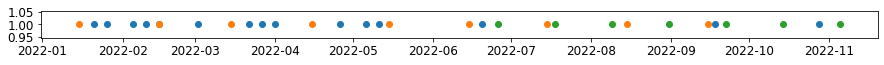

In [14]:
plt.figure(figsize = (15,0.5))
plt.scatter(st, sty)
plt.scatter(pt, pty)
plt.scatter(ts, tsy)
plt.show()

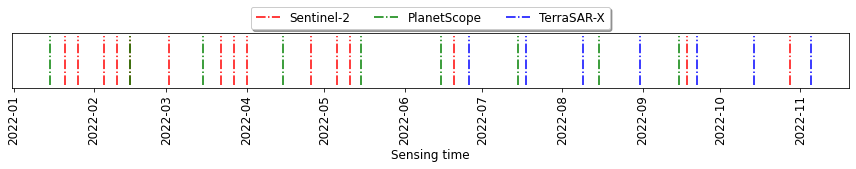

In [17]:
name = 'F:/EO_Africa_DAT/Figures/SntinelPlanetTSX.png'
plt.figure(figsize = (15,1))
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = True, bottom = True)
plt.vlines(st, 0.0,0.1,  colors='r', label='Sentinel-2', linestyles='dashdot')
plt.vlines(pt, 0.0,0.1, colors='g', label='PlanetScope', linestyles='dashdot')
plt.vlines(ts, 0.0,0.1, colors='b', label='TerraSAR-X', linestyles='dashdot')

plt.xticks(rotation=90)
plt.xlabel('Sensing time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6), fancybox=True, shadow=True, ncol=5)
plt.savefig(name, dpi=350,bbox_inches='tight')
plt.show()

In [68]:
def getSplitIndex(root, index_fold, valid_ratio=0.1, return_val=False):
    
    folds = sorted(os.listdir(root))
    print(f'Datasets obtained in root folder: {folds}', end = '\r', flush=True)

    labels = []
    
    for fold in folds:
        lbs = sorted(glob(f'{root}/{fold}/train/labels/*.pt'))
        labels.append(lbs)
        
    assert len(labels[0]) == len(labels[0]) == len(labels[0]), 'labels have no equal length'
    
    print('Generating indexes...')
    ys = np.array([torch.load(lb).item() for lb in labels[0]]).reshape(-1,1)
    inds = np.array(range(len(ys))).reshape(-1,1)
    print('Indexes generated and started sampling!')
    
    assert inds.shape == ys.shape, 'index and labels shape dod not much'
    
    X_train, X_valid, y_train, y_valid = train_test_split(inds, ys, test_size=valid_ratio, random_state=2)
    
    X_train = torch.from_numpy(X_train.ravel())
    X_valid = torch.from_numpy(X_valid.ravel())
    
    if not os.path.exists(index_fold):
        os.makedirs(index_fold, exist_ok=True)
    
    print('Sampling done ands aving files')
    train_name = f'{index_fold}/train_index.pt'
    valid_name = f'{index_fold}/valid_index.pt'
    
    torch.save(X_train, train_name)
    torch.save(X_valid, valid_name)
    
    if return_val:
        return X_train, X_valid

In [70]:
def sampleSplit(root, index_file, phase='train'):
    
    indexes = sorted(torch.load(index_file).tolist()) # list of indexes
    tsx_files = sorted(glob(f'{root}/TSX/{phase}/images/*.pt'))
    sen_files = sorted(glob(f'{root}/Sentinel/{phase}/images/*.pt'))
    plan_files = sorted(glob(f'{root}/Planet/{phase}/images/*.pt'))
    label_files = sorted(glob(f'{root}/TSX/{phase}/labels/*.pt'))
    
    tsx_sample = [tsx_files[ind] for ind in indexes]
    sen_sample = [sen_files[ind] for ind in indexes]
    plan_sample = [plan_files[ind] for ind in indexes]
    label_sample = [label_files[ind] for ind in indexes]
    print('Spliting done!')
    assert len(tsx_sample) == len(sen_sample) == len(plan_sample) == len(label_sample), 'Validation images and labels not matching'
    
    return sen_sample, plan_sample,tsx_sample, label_sample

In [71]:
def generateIndex(file, ratio=0.1):
    ys = np.array(torch.load(file).tolist())
    inds = np.array(range(len(ys))).reshape(-1,1)
    assert inds.shape == ys.shape, 'index and labels shape dod not much'
    X_train, X_valid, y_train, y_valid = train_test_split(inds, ys, test_size=ratio, random_state=2, stratify=ys)
    
    return X_train, X_valid

In [72]:
def sampleSplitArray(root, t_index=None, v_index=None, phase='train', one_hot=True):
    
    tsx_files = torch.load(f'{root}/TSX/{phase}/images/points.pt')
    sen_files = torch.load(f'{root}/Sentinel/{phase}/images/points.pt')
    plan_files = torch.load(f'{root}/Planet/{phase}/images/points.pt')
    label_files = torch.load(f'{root}/TSX/{phase}/labels/points.pt')
    
    if phase=='train':
        if t_index is None or v_index is None:
            ind_t,ind_v = generateIndex(file, ratio=0.1)
        else:
            ind_t = torch.load(t_index).tolist() # list of indexes
            ind_v = torch.load(v_index).tolist()
            print('Index files loaded')
    
        tsx_sample_t = tsx_files[ind_t]
        sen_sample_t = sen_files[ind_t] 
        plan_sample_t = plan_files[ind_t]
        label_sample_t = label_files[ind_t]
        if one_hot:
            label_sample_t = torch.nn.functional.one_hot(label_sample_t.long(), num_classes=11).squeeze()

        assert len(tsx_sample_t) == len(sen_sample_t) == len(plan_sample_t) == len(label_sample_t), 'Test images and labels not matching'

        tsx_sample_v = tsx_files[ind_v]
        sen_sample_v = sen_files[ind_v] 
        plan_sample_v = plan_files[ind_v]
        label_sample_v = label_files[ind_v]

        assert len(tsx_sample_v) == len(sen_sample_v) == len(plan_sample_v) == len(label_sample_v), 'Test images and labels not matching'

        print('Validation sample done!')

        return (sen_sample_t, plan_sample_t,tsx_sample_t, label_sample_t), (sen_sample_v, plan_sample_v,tsx_sample_v, label_sample_v)
    else:
        if one_hot:
            label_files = torch.nn.functional.one_hot(label_files.long(),num_classes=11).squeeze()
        return sen_files, plan_files, tsx_files, label_files

In [73]:
def getTestDataset(root, phase='test'):
    tsx_sample = sorted(glob(f'{root}/TSX/{phase}/images/*.pt'))
    sen_sample = sorted(glob(f'{root}/Sentinel/{phase}/images/*.pt'))
    plan_sample = sorted(glob(f'{root}/Planet/{phase}/images/*.pt'))
    label_sample = sorted(glob(f'{root}/TSX/{phase}/labels/*.pt'))
    assert len(tsx_sample) == len(sen_sample) == len(plan_sample) == len(label_sample), 'Test images and labels are not of equal length'
    print('File scanning done!')
    return sen_sample, plan_sample, tsx_sample, label_sample

In [74]:
def normalize(tensor):
    return (tensor-tensor.min())/((tensor.max()-tensor.min())+0.000001)

In [75]:
def channel_swap(tensor):
    return tensor.permute(1, 0)

In [55]:
####################### Extract data #######################################
files_p = glob('F:/EO_Africa_DAT/Planet_Scope_Analytic/Crops/*.tif')
files_s = glob('F:/EO_Africa_DAT/Sentinel-2/Resampled/*.tif')
files_t = glob('F:/EO_Africa_DAT/TeraSAR-X/Coregistered/*.tif')
shape = 'F:/EO_Africa_DAT/Field_data/Processed/Join_final.shp'
grand_fold = 'F:/EO_Africa_DAT/SITS_INDEX_SPECTRAL_MEAN_final'
# fold_plnt = 'F:/EO_Africa_DAT/Planet_Scope_Analytic/Resampled'
# fold_tsxt = 'F:/EO_Africa_DAT/SITS_ALL_Numpy/TSX'
# fold_sntl = 'F:/EO_Africa_DAT/SITS_ALL_Numpy/Sentinel'


extractRasterPlanet(files=files_p, shape=shape, allinone=True, save=True, fold=grand_fold, data = 'Planet', phase='train') # phase='train'
extractRasterPlanet(files=files_p, shape=shape, allinone=True, save=True, fold=grand_fold, data = 'Planet', phase='test')

extractRasterTSX(files=files_t, shape=shape, allinone=True, save=True, fold=grand_fold, data='TSX', phase='train')
extractRasterTSX(files=files_t, shape=shape, allinone=True, save=True, fold=grand_fold, data='TSX', phase='test')

extractRasterSentinel(files=files_s, shape=shape, allinone=True, save=True, fold=grand_fold, data='Sentinel', phase='train')
extractRasterSentinel(files=files_s, shape=shape, allinone=True, save=True, fold=grand_fold, data='Sentinel', phase='test')

Train shape:  (2049, 1) label shape:  (2049, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted RGB array summary
shape of Red: (1639, 11)
shape of green: (1639, 11)
shape of Blue: (1639, 11)
shape of class: (1639, 1)
image shape before removeing zeros: (1639, 11, 4)
label shape before removeing zeros: (1639, 1)
image shape after removeing zeros: (1639, 11, 4)
label shape after removeing zeros: (1639, 1)
saved to path F:/EO_Africa_DAT/SITS_INDEX_SPECTRAL_MEAN_final/Planet/train/images/points.pt
saved to path F:/EO_Africa_DAT/SITS_INDEX_SPECTRAL_MEAN_final/Planet/train/labels/points.pt
Train shape:  (2049, 1) label shape:  (2049, 1)
{'Bareland': 0, 'Fruits': 1, 'Grass': 2, 'Guizota': 3, 'Lupine': 4, 'Maize': 5, 'Millet': 6, 'Others': 7, 'Pepper': 8, 'Teff': 9, 'Vegetables': 10}
Extracted RGB array summary
shape of Red: (410, 11)
shape of green: (410, 11)
shape of Blue: (410, 11)

In [60]:
def plot_confusion_matrix(cm,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          path=None,
                          target_names=None,
                          fname=None,
                          save=False):
#     target_names = ['Bareland',
#                     'Fruits',
#                     'Grass',
#                     'Guizota',
#                     'Lupine',
#                     'Maize',
#                     'Millet',
#                     'Others',
#                     'Pepper',
#                     'Teff',
#                     'Vegetables'
#                    ]
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    fname = f'{path}/{fname}.png'
    if save:
        plt.savefig(fname=fname, dpi=350, facecolor='auto', edgecolor='auto', bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [2]:
confusion_matrix(y_pred, y_true)